## Final Project Submission

You'll clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.

Please fill out:
* Student name: Caitlin Snyder
* Student pace: self-paced
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


# 1) Introduction

As I wrap up Module 2 of Flat Iron's Data Science bootcamp, I will be conducting multiple linear regression on a subset of the King County Housing Sale Price dataset. I've referenced the 
[King County Realtor Glossary](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) to interpret the feature names included in the dataset. Follow along below, or take a look at the [Jupyter notebook]().

To guide my analysis, I began by asking three questions that were of interest to me as I read through the King County Realtor Glossary:

1) What is the effect on sale price of classification as a low grade* property?

2) What is the effect on sale price of classification as a high condition* property?

3) What is the effect on sale price of having a waterfront?

**as defined by the [King County Assesor's Office](https://kingcounty.gov/depts/assessor/~/media/depts/Assessor/documents/AreaReports/2019/Residential/015.ashx)*

I'll try to answer these questions using multiple linear regression--let's get started!

# 2) Import the data 

Import the relevant libraries:

In [637]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression

Read in and preview the data:

In [709]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Examining the data, we see that we have 15429 rows:

In [710]:
df.shape
# (21597, 21)

(21597, 21)

We can call describe() on the dataframe to get an overview of the descriptive statistics corresponding to each attribute:

In [641]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 3) Prepare the data

Reviewing the data types, we see that both date and sqft_basement are stored as strings. We will need to address these:

In [642]:
df.dtypes

# id                 int64
# date              object
# price            float64
# bedrooms           int64
# bathrooms        float64
# sqft_living        int64
# sqft_lot           int64
# floors           float64
# waterfront       float64
# view             float64
# condition          int64
# grade              int64
# sqft_above         int64
# sqft_basement     object
# yr_built           int64
# yr_renovated     float64
# zipcode            int64
# lat              float64
# long             float64
# sqft_living15      int64
# sqft_lot15         int64
# dtype: object

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Dropping irrelevant columns

We don't need 'id' for our analysis--we can drop this column:

In [643]:
df.drop(['id'], axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)

### Identify null values

Our dataset consists of 15429 rows. The total number  of records with null values (2376+63+454+3842=6735, or 44%) is currently far greater than 5%, meaning that simply dropping these records would likely significantly impact our analyses.

Let's examine each attribute individiually to determine the appropriate course of action.

In [644]:
df.isna().sum()

# date                0
# price               0
# bedrooms            0
# bathrooms           0
# sqft_living         0
# sqft_lot            0
# floors              0
# waterfront       2376
# view               63
# condition           0
# grade               0
# sqft_above          0
# sqft_basement       0
# yr_built            0
# yr_renovated     3842
# zipcode             0
# lat                 0
# long                0
# sqft_living15       0
# sqft_lot15          0
# dtype: int64

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We need to decide how to handle null values in sqft_basement, waterfront, view, and yr_renovated.

### Clean the categorical features

Identify and isolate the categorical features:

In [645]:
cat_features = ['waterfront', 'view', 'condition', 'grade', 'zipcode', 'date']
df_cat = df[cat_features]

*Date* is currently stored as strings. If we inspect the unique years, we see that only 2014 and 2015 are present in the data. We can simplify date to reflect only the relevant year:

In [646]:
pd.DatetimeIndex(pd.to_datetime(df_cat['date'])).year.unique()
df_cat['date'] = pd.DatetimeIndex(pd.to_datetime(df['date'])).year

*Waterfront* and *View* are both categorical features. Waterfront has 2376 missing values (roughly 15% of all records) while view has only 63. The great news is that we don't have much heavy lifting to do here--all we have to do is specify that our features will have nan values in our one-hot encoding:

In [702]:
df_cat = df_cat.astype('str')
df_ohe = pd.get_dummies(df_cat, prefix=cat_features, dummy_na=True, drop_first=True)


### Clean the continuous features

Our continuous features are those that are not categorical:

In [648]:
cont_features = [feat for feat in df.columns.tolist() if feat not in cat_features]
df_cont = df[cont_features]


In addition to missing values, *Year renovated* contains a problematic value: 0. 0 does not make logical sense in this context. Let's replace these values with the median:

In [649]:
def impute_median(df, col):
    df_one_col = df[[col]]
    df_one_col.fillna(df_one_col.median(), inplace=True)
    df[col] = df_one_col[col]
    

In [650]:
df_cont['yr_renovated'] = df_cont.apply(
     lambda row: np.nan if row['yr_renovated'] == 0 else row['yr_renovated'],
     axis=1)

impute_median(df_cont, 'yr_renovated')

Values for *Basement square footage* are currently stored as strings--and these include question marks! We'll convert the entire column to numeric values, replacing nulls and question marks (missing values) with the median.

In [651]:
df_cont['sqft_basement'] = df_cont.apply(
     lambda row: np.nan if row['sqft_basement'] == '?' else float(row['sqft_basement']),
     axis=1)

impute_median(df_cont, 'sqft_basement')

Before we can normalize our continuous values, we need to apply an offset to handle any negatives or 0s:

In [652]:
def handle_zeros_pre_log(df, col):
    no_zeros = df.loc[df[col] > 0]
    col_min = no_zeros[col].min()
    offset = col_min/2
    df[col] = df.apply(
        lambda row: row[col] + offset,
        axis=1)
    
def handle_negatives_pre_log(df, col):
    col_min = abs(df[col].min()) + 1
    df[col] = df.apply(
        lambda row: row[col] + col_min,
        axis=1)

handle_zeros_pre_log(df_cont, 'sqft_basement')
handle_negatives_pre_log(df_cont, 'long')


And normalize!

In [653]:
df_log = np.log(df_cont)
cont_features = [f'{column}_log' for column in df_cont.columns]
df_log.columns = cont_features

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

### Recombine features

Now we'll 'glue' our continuous and categorical features back together in a single dataframe:

In [681]:
df_clean = pd.concat([df_log_norm, df_ohe], axis=1)
df_clean = df_clean.astype('float')
df_clean.head()

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,sqft_above_log,sqft_basement_log,yr_built_log,yr_renovated_log,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,zipcode_nan,date_2015,date_nan
0,-1.401998,-0.279718,-1.726509,-1.125556,-0.388430,-0.960852,-0.753565,-0.780762,-0.537409,0.047377,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.279938,-0.279718,0.339653,0.709446,-0.113241,1.006831,0.672693,1.060276,-0.674325,-2.951470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.799430,-1.711611,-1.726509,-2.131893,0.244475,-0.960852,-1.752954,-0.780762,-1.293945,0.047377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.499698,0.736226,1.072635,0.070674,-0.523914,-0.960852,-1.026835,1.401732,-0.196338,0.047377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.178434,-0.279718,0.039555,-0.292725,0.008139,-0.960852,0.073515,-0.780762,0.547946,0.047377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Let's verify that our log transformation has not introduced any nan values:

In [655]:
df_clean.isna().sum().max()
# 0

0

### Evaluate multi-collinearity and outliers

We'll generate a correlation matrix to return pairwise correlations and identify highly correlated predictors. We will want to be aware of these correlations as we narrow in on our primary predictors. We are interested in values with absolute values roughly between 0.75 (strong positive correlation) and 1 (perfect positive correlation).

In [657]:
(df_clean[df_log_cols].corr()).head() # Snapshot of correlation test results

,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,sqft_above_log,sqft_basement_log,yr_built_log,yr_renovated_log,lat_log,long_log,sqft_living15_log,sqft_lot15_log
bedrooms_log,1.000000,0.534008,0.648121,0.195969,0.213203,0.546713,0.194754,0.194530,0.034958,-0.026777,0.167481,0.425690,0.175649
bathrooms_log,0.534008,1.000000,0.760764,0.084877,0.510644,0.683889,0.198207,0.532918,0.043528,0.011330,0.248056,0.570469,0.079120
sqft_living_log,0.648121,0.760764,1.000000,0.325983,0.393568,0.864979,0.291526,0.348973,0.016344,0.038881,0.265309,0.746836,0.303058
sqft_lot_log,0.195969,0.084877,0.325983,1.000000,-0.211802,0.318663,-0.008953,-0.004421,-0.026689,-0.149394,0.378088,0.363743,0.918665
floors_log,0.213203,0.510644,0.393568,-0.211802,1.000000,0.578054,-0.270004,0.471533,0.008174,0.038612,0.144320,0.300459,-0.203229


With this many predictor variables, it can be easier to visualize the correlations with a heat map. In the heat map below, we can identify relationships to explore in greater detail.

Note the high positive correlation in pairs for which both variables relate to square footage: for example, sqft_above and sqft_living.

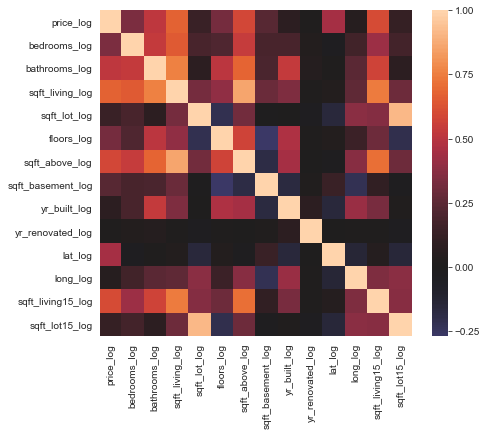

In [658]:
def generate_heat_map(df, features):
    plt.figure(figsize=(7, 6))
    sns.heatmap(df[features].corr(), center=0)

generate_heat_map(df_clean, cont_features)

The correlation matrix indicates an almost perfect (~0.91) relationship between sqft_lot15_log and sqft_lot_log. This makes sense, since we would expect lots within the same neighborhood to be opf similar size. Let's remove sqft_lot15_log and run the heat map analysis again:

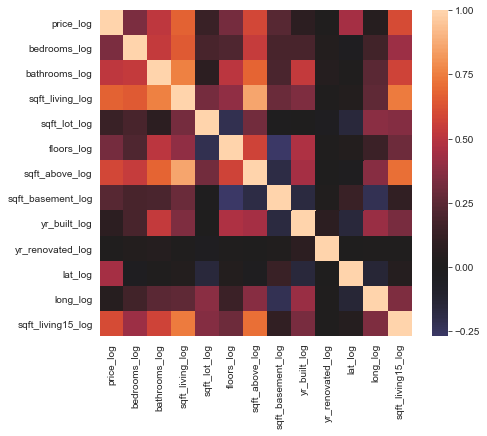

In [659]:
def remove_col(df, col, features):
    df.drop([col], axis=1, inplace=True)
    features.remove(col)
    
remove_col(df_clean, 'sqft_lot15_log', cont_features)
generate_heat_map(df_clean, cont_features)


Much better.

We also can get a sense of the outliers in our data using boxplots.

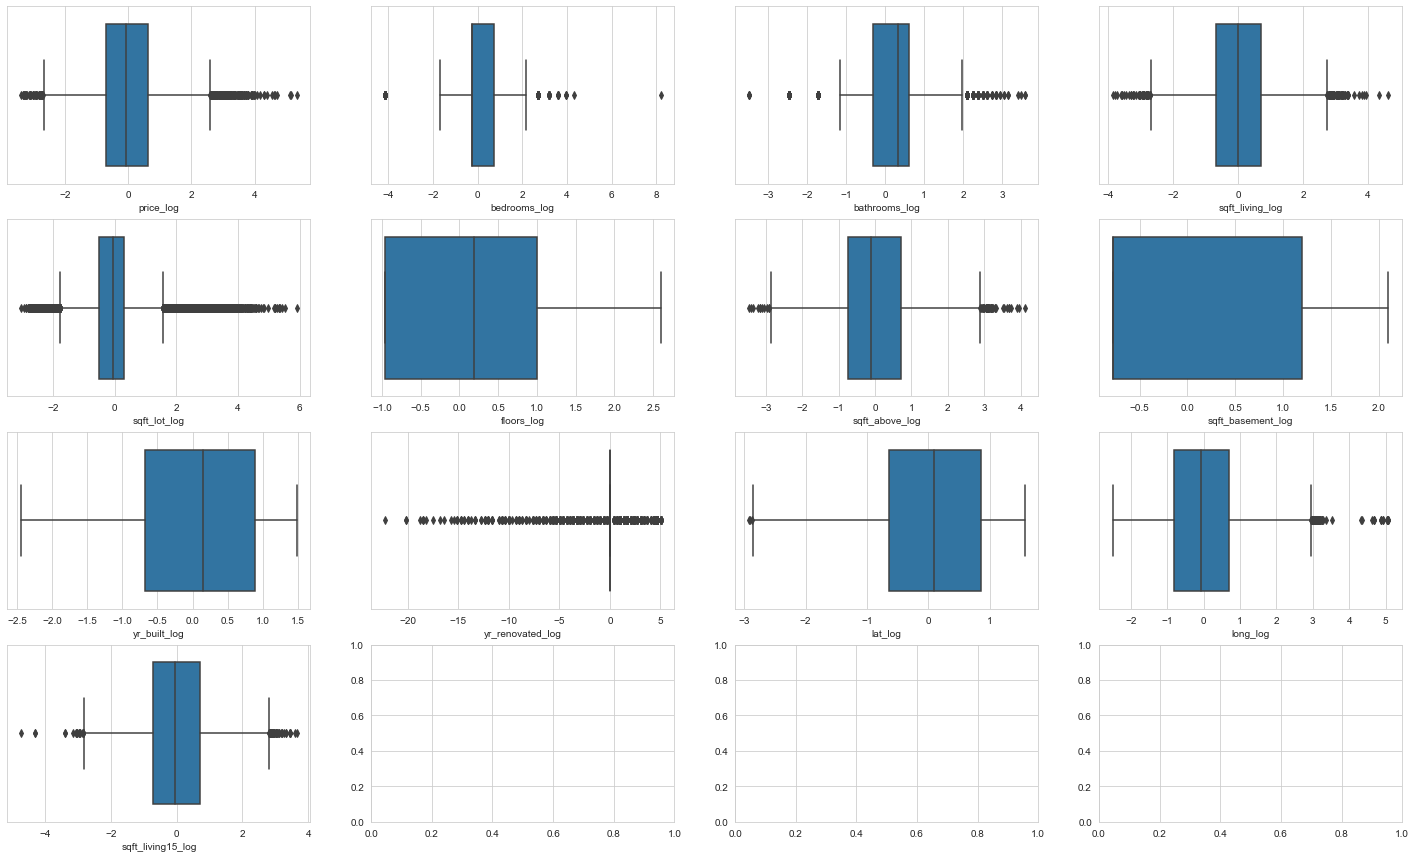

In [705]:
def plot_boxplot(df, cols):
    fig, axes = plt.subplots(4, 4, figsize=(25, 15))
    axe = axes.ravel()

    for i, xcol in enumerate(cols):
        sns.boxplot(x=df[xcol], ax=axe[i])
        
plot_boxplot(df_clean, cont_features)

After some experimentation removing outliers beyond three standard deviations, I've decided to keep the outliers. Housing prices vary widely, and outliers can provide us with meaningful information about luxury properties and similarly about dilapidated properties. 

# 4) Preview the relationships

We'll get a feel for the general trends in our data by previewing the relationship between each continuous predictors and the outcome variable (price) in a scatter plot.

In the below, we can already visually detect a strong positive correlation between price and sqft_living, bathrooms, sqft_living_above, sqft_basement and sqft_living15. Evidently, larger houses command higher prices.

A weaker positive correlation is also visible between price and bedrooms. We can also see in a clear indication in sqft_basement and yr_renovated where we have replaced missing values with the median.

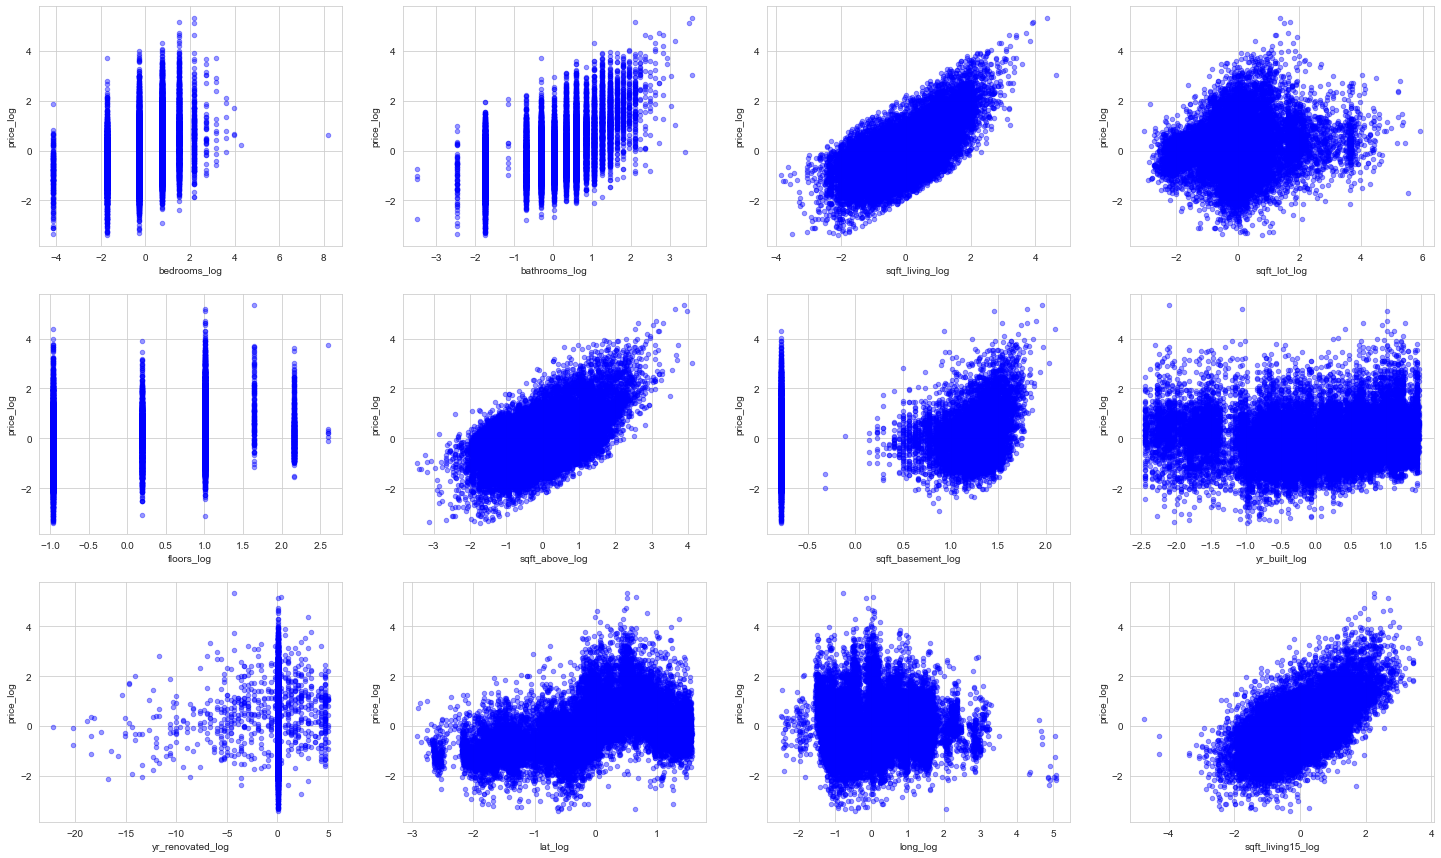

In [661]:
def plot_scatterplot(df, cols, outcome):
    fig, axes = plt.subplots(3, 4, figsize=(25, 15))
    axe = axes.ravel()

    for i, xcol in enumerate(cols):
        df.plot(kind='scatter', x=xcol, y=outcome, alpha=0.4, color='b', ax=axe[i])

outcome = 'price_log'
preds = [i for i in cont_features if i != outcome]
plot_scatterplot(df_clean, preds, outcome)


# 5) Transform the data

Create the training and test data subsets:

In [685]:
def get_test_and_training(df, preds, outcome):

    # Create X and y
    y = df_clean[outcome]
    X = df_clean[preds]

    # Split data into training and test sets
    return train_test_split(X, y, test_size=0.2, random_state=10)

def get_ols(X, y):
    results = sm.OLS(y, X).fit()
    print(results.summary())
    
    

In [686]:
preds = [i for i in df_clean.columns if i != outcome]
    
X_train, X_test, y_train, y_test = get_test_and_training(df, preds, outcome)

result = get_ols(X_train, y_train)


                                 OLS Regression Results                                
Dep. Variable:              price_log   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              1301.
Date:                Sat, 15 May 2021   Prob (F-statistic):                        0.00
Time:                        14:19:24   Log-Likelihood:                         -5666.3
No. Observations:               17277   AIC:                                  1.154e+04
Df Residuals:                   17173   BIC:                                  1.235e+04
Df Model:                         104                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

Reviewing the output, we now want to remove all features associated with a p-value greater than our alpha of 0.05. Let's isolate these feature names in an array called 'exclude' and then re-run the analysis with an updated predictor array:

In [676]:
exclude = [
    'zipcode_98178',
    'zipcode_98155',
    'zipcode_98148',
    'zipcode_98133',
    'zipcode_98055',
    'zipcode_98030',
    'zipcode_98031',
    'zipcode_98028',
    'zipcode_98019',
    'zipcode_98011',
    'zipcode_98002',
    'grade_3',
    'view_nan',
    'condition_nan',
    'waterfront_nan',
    'condition_4',
    'zipcode_nan',
    'date_nan'
]

In [687]:
preds = [i for i in df_clean.columns if i not in exclude and i != outcome]

X_train, X_test, y_train, y_test = get_test_and_training(df, preds, outcome)

result = get_ols(X_train, y_train)


                                 OLS Regression Results                                
Dep. Variable:              price_log   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              1518.
Date:                Sat, 15 May 2021   Prob (F-statistic):                        0.00
Time:                        14:19:41   Log-Likelihood:                         -5683.8
No. Observations:               17277   AIC:                                  1.155e+04
Df Residuals:                   17188   BIC:                                  1.224e+04
Df Model:                          89                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# 6) Build a linear regression model

Now we'll fit the model using a simple linear regression classifier to establish a baseline r-squared value and evaluate the mean-squared errors:

In [688]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Print R2 and MSE for training and test sets
print('Training r^2:', linreg.score(X_train, y_train))
print('Test r^2:', linreg.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg.predict(X_train)))
print('Test MSE:', mean_squared_error(y_test, linreg.predict(X_test)))

# Training r^2: 0.8872475048229136
# Test r^2: 0.8807761768707825
# Training MSE: 0.1129412222332609
# Test MSE: 0.11839812810173139

Training r^2: 0.8872475048229136
Test r^2: 0.8807761768707825
Training MSE: 0.1129412222332609
Test MSE: 0.11839812810173139


Neat! Not only are our r-squared values fairly high (0.887 and 0.881), but our mean-squared errors (0.113 and 0.118) do not differ significantly.

# 7) Answering our questions

Each coefficient in the earlier OLS ouput reflects the effect of the corresponding feature on price when all other variables are held constant. (Note that the documentation does not indicate the what scaling have been used on the price column, and so "sale price units" is used in place of specific dollar amounts.)

Now that the linear regression output has given us reason to feel confident in our model, we can finally tackle the questions we posed at the start of this notebook.

For example, we see that Squarefoot living has a significant (but low to moderate) coefficient of 0.1785. We interpret this as: "Each additional 1 squarefoot of living space yields a 0.1785 increase in sale price units."


### What is the effect on sale price of classification as a low grade property?


The lowest grade in our dataset is grade 4 (*"Generally older low quality construction. Does not meet code."*). It's possible that grades 0-3 are not present in our dataset because such structures do not meet the minimum standards for sale in King County.

* Grade 4 (coeff = -0.7861 ): Having a grade code of 4 yields a 0.7861 decrease in sale price units.

I am surprised that the effect of a grade 4 classification is lower than that of a grade 5 *("Lower construction costs and workmanship. Small, simple design")* clasification.

### 2) What is the effect on sale price of classification as a high condition property?

The highest condition included in our dataset and in the range of possible values is condition 5 *(Very good: "Excellent maintenance and updating on home. Not a total renovation.").

* Condition 5 (coeff = 0.1305): Having a condition code of 5 yields a 0.1305 decrease in sale price units.

Note that the lower conditions (condition 3, coeff = -0.0751; condition 2, coeff = -0.3391) predictably have the effect of decreasing the sale price.

### 3) What is the effect on sale price of having a waterfront?

It should come as no surprise that properties with a waterfront view can command significantly better sale prices:

* Waterfront_1 (coeff = 0.1305): Having a waterfront view yields a 0.891 increase in sale price units.



# 8) Conclusion

Overall, the patterns that emerge in the above analyses do not deviate from what a layman might expect to find in the housing market. Bigger, higher quality houses with attractive views tend to command higher sale prices.

### Sources

* Outliers: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba, https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

* Log transformations: https://discuss.analyticsvidhya.com/t/methods-to-deal-with-zero-values-while-performing-log-transformation-of-variable/2431/2

* OHE: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

* Stepwise regression: https://towardsdatascience.com/stepwise-regression-tutorial-in-python-ebf7c782c922

* Interpreting coefficients: https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/